#
### Michael Eggleston, Kenneth Fabela, David Sanchez
### Dr. To
### PHYS 4102 - 001
### 20 March 2024
# <center> Lab 2: Average Lifetime of Muons</center>

<span style="font-size: 24px;">The purpose of this experiment is to find the mean lifetime of muons and the background percentage with uncertainties.</span>

### Calculating how far a muon will travel if we do not account for the effect of special relativity using the mean lifetime at the speed of 0.999c:
    
c = 299,792,458 m/s

0.999 * c $\approx$ 299,492,666 m/s = $v$
    
Average lifetime of a muon = 2.2 $\mu s$ = $t_1$

$d = vt_1 \approx 658.884m$
    
### Calculating how far a muon will travel with special relativity taken into account:
    
muon lifetime $t = γ(2.20 µs)$

$γ = 1/\sqrt{1-(v/c)^2} = 1/\sqrt{1-(0.999c/c)^2} \approx 22.4$

$t \approx 22.4(2.20 µs)$

$t \approx 49.28 µs = t_2$

$d = (v)(t_2) \approx 14,759.0m$
    
### Calculating the expected muon rate in our detector:

Radius of our cylindrical detector = 15cm
    
Area of our detector = A = $\pi r^2 = \pi (\frac{15cm}{2}^2) \approx 177 muons/min$

$\frac{177 muons/min}{60s} = 2.95 muons/s$

The expected muon rate in our detector is $2.95$ muons/s 

In [63]:
# Importing needed functions
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

# Muon Data Collection 1 (runtime: ~46 hrs.)

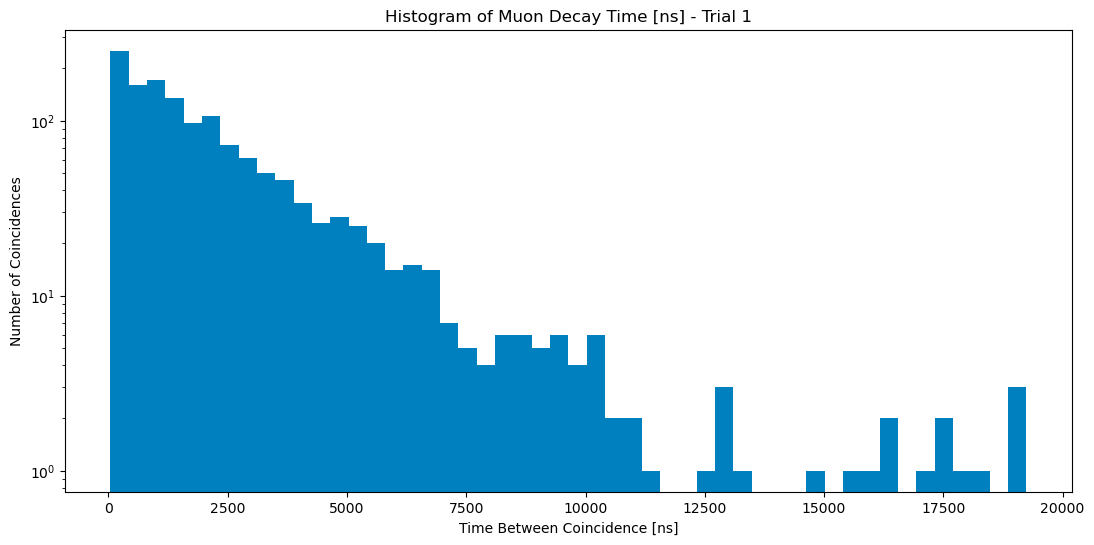

In [64]:
# Importing data
muon_raw_data1 = np.loadtxt("Lab 2 Data/muon_data1.txt", delimiter=' ')

# Filtering out data points where muon decays are not detected

# Empty list to put the muon decay data points into
muon_data1 = []

# Finding muon decay data points and putting them into the previously mentioned list
for i in range(0,len(muon_raw_data1)):
    if muon_raw_data1[i,0] < 39999:
        muon_data1.append(muon_raw_data1[i,0])

import matplotlib.pyplot as plt

# Defining a darker shade of blue using RGB values
blue_1 = (0, 0.5, .75)  # Adjusting the values to change the shade of blue

# Plotting the muon decay data points as a histogram with a log-scale y-axis
plt.figure(figsize=(13, 6))
plt.hist(muon_data1, bins=50, color=blue_1)
plt.title('Histogram of Muon Decay Time [ns] - Trial 1')
plt.xlabel('Time Between Coincidence [ns]')
plt.ylabel('Number of Coincidences')
plt.yscale('log')
plt.show()


## Creating An Exponential Fit

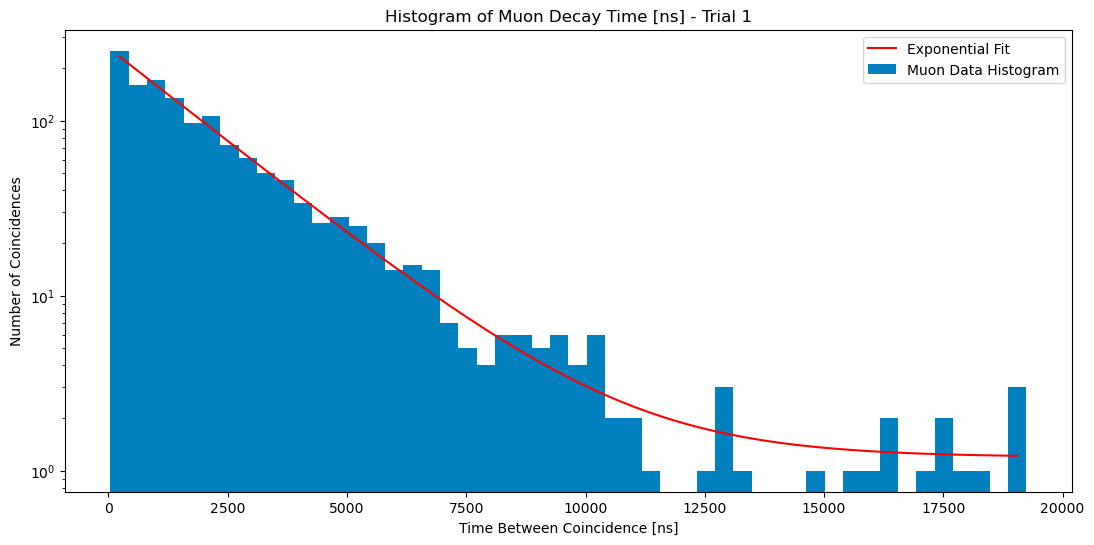

In [65]:
# Finding bin edges and calculating bin centers
count_per_bin1, bin_edges1 = np.histogram(muon_data1, bins = 50)

# Length between edge of bin and center
bin_center_distance1 = (bin_edges1[1] - bin_edges1[0])/2

# Calculating bin centers
bin_centers1 = (bin_edges1 + bin_center_distance1)[0:len(bin_edges1)-1] 
# The -1 gets rid of the last bin edge which doesn't exist

# Fitting an exponential decay curve to the histogram data

# Creating exponential decay function
def ExponentialDecay(t, A, tau, B):
    return A*np.exp(-t/tau)+B

# Initial values
muon_data1_param0 = (300, 2500, 10)

# Fitting exponential decay function to bin centers
muon_data1_paramFit, muon_data1_paramErr = optimize.curve_fit(ExponentialDecay,
                                                              bin_centers1, 
                                                              count_per_bin1,
                                                              muon_data1_param0)


# Calculating y-values of best fit using best fit parameters
muon_data1_fit = ExponentialDecay(bin_centers1,
                                  muon_data1_paramFit[0],
                                  muon_data1_paramFit[1],
                                  muon_data1_paramFit[2])

# Defining a darker shade of blue using RGB values
blue_1 = (0, 0.5, .75)  # Adjusting the values to change the shade of blue


# Plotting fit to histogram of data
plt.figure(figsize=(13,6))
plt.plot(bin_centers1, muon_data1_fit, label='Exponential Fit', color='red')
plt.hist(muon_data1, bins = 50, color=blue_1, label='Muon Data Histogram')
plt.title('Histogram of Muon Decay Time [ns] - Trial 1')
plt.xlabel('Time Between Coincidence [ns]')
plt.ylabel('Number of Coincidences')
plt.yscale('log')
plt.legend()
plt.show()


## Calculating Poisson Error

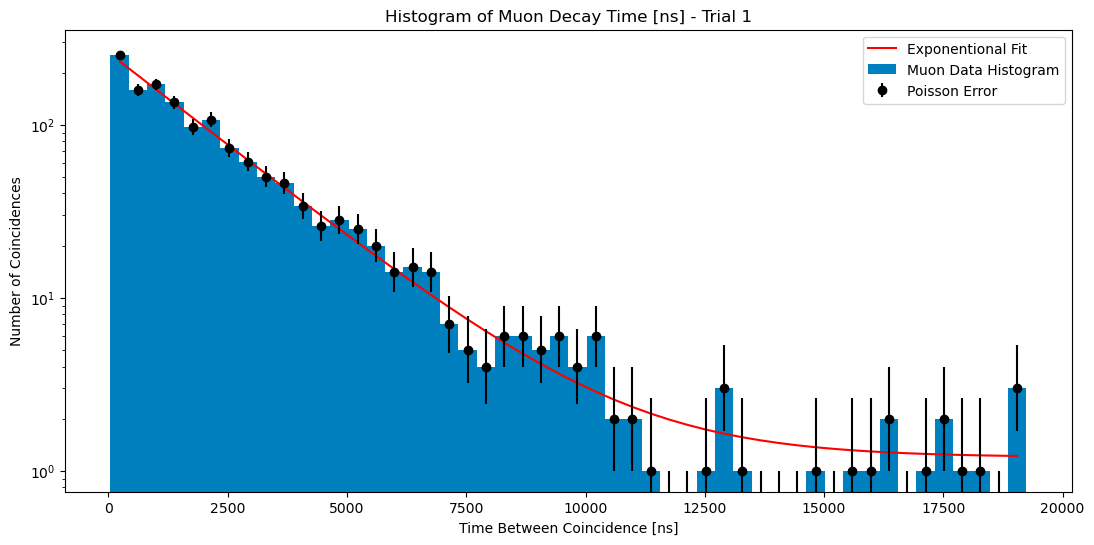

[2.52656108e+02 2.09734727e+03 2.14611091e-01]
[[ 8.61114027         nan  0.65334416]
 [        nan 61.23992666         nan]
 [ 0.65334416         nan  0.23526601]]


/var/folders/r6/cc1z18ld07zdcz83rqq66mp40000gn/T/ipykernel_1810/2903547468.py:39: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(muon_data1_paramErr_sigma))


In [66]:
# Calculating error in the data bins and plotting them as error bars

# Calculating the high and low error in Poisson error
ErrHighMuon1 = 0.5+np.sqrt(count_per_bin1+0.25)
ErrLowMuon1 = -0.5+np.sqrt(count_per_bin1+0.25)

# Defining a darker shade of blue using RGB values
blue_1 = (0, 0.5, .75)  # Adjusting the values to change the shade of blue

# Plotting fit and histogram with error
plt.figure(figsize=(13,6))
plt.plot(bin_centers1, muon_data1_fit, label='Exponentional Fit', color='red')
plt.hist(muon_data1, bins = 50, label='Muon Data Histogram', color=blue_1)
plt.errorbar(bin_centers1,
             count_per_bin1,
             [ErrLowMuon1,ErrHighMuon1],
             ls='',
             marker='o',
             mfc='black',
             ms=6,
             mec='black',
             ecolor='black',
             label="Poisson Error")
plt.title('Histogram of Muon Decay Time [ns] - Trial 1')
plt.xlabel('Time Between Coincidence [ns]')
plt.ylabel('Number of Coincidences')
plt.yscale('log')
plt.legend()
plt.show()

# Fits exponential decay function to bin centers
muon_data1_paramFit_sigma, muon_data1_paramErr_sigma = optimize.curve_fit(ExponentialDecay,
                                                              bin_centers1, 
                                                              count_per_bin1,
                                                              muon_data1_param0,
                                                              sigma=ErrHighMuon1)

print(muon_data1_paramFit_sigma)
print(np.sqrt(muon_data1_paramErr_sigma))


#

<span style="font-size: 24px;">A = 252.7 $\pm$ 8.11, $\tau$ = 2.10 $\pm$ 0.06 $\mu s$ , B = 0.21 $\pm$ 0.24 events,</span>

<span style="font-size: 24px;">where A is the value (height) of the first bin (which we don't care about), $\tau$ is the average lifetime of a muon and B represents background events per bin (noise).</span>

#

# Muon Data Collection 2 (runtime: ~ hrs.)

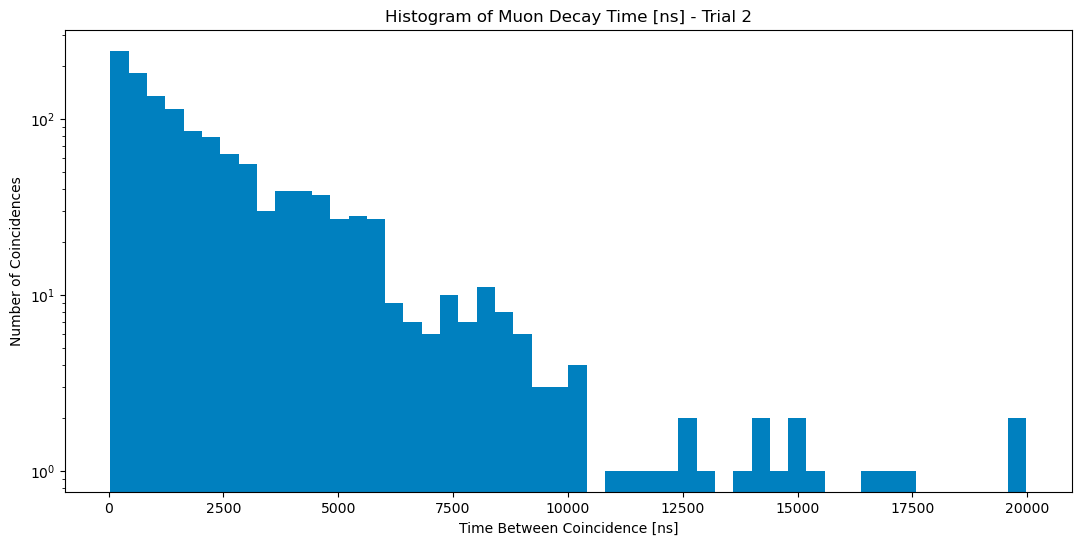

In [67]:
# Importing data
muon_raw_data2 = np.loadtxt("Lab 2 Data/muon_data2.txt", delimiter=' ')

# Filtering out data points where muon decays are not detected

# Empty list to put the muon decay data points into
muon_data2 = []

# Finding muon decay data points and putting them into the previously mentioned list
for i in range(0,len(muon_raw_data2)):
    if muon_raw_data2[i,0] < 39999:
        muon_data2.append(muon_raw_data2[i,0])

import matplotlib.pyplot as plt

# Defining a darker shade of blue using RGB values
blue_1 = (0, 0.5, .75)  # Adjusting the values to change the shade of blue

# Plotting the muon decay data points as a histogram with a log-scale y-axis
plt.figure(figsize=(13, 6))
plt.hist(muon_data2, bins=50, color=blue_1)
plt.title('Histogram of Muon Decay Time [ns] - Trial 2')
plt.xlabel('Time Between Coincidence [ns]')
plt.ylabel('Number of Coincidences')
plt.yscale('log')
plt.show()


## Creating An Exponential Fit

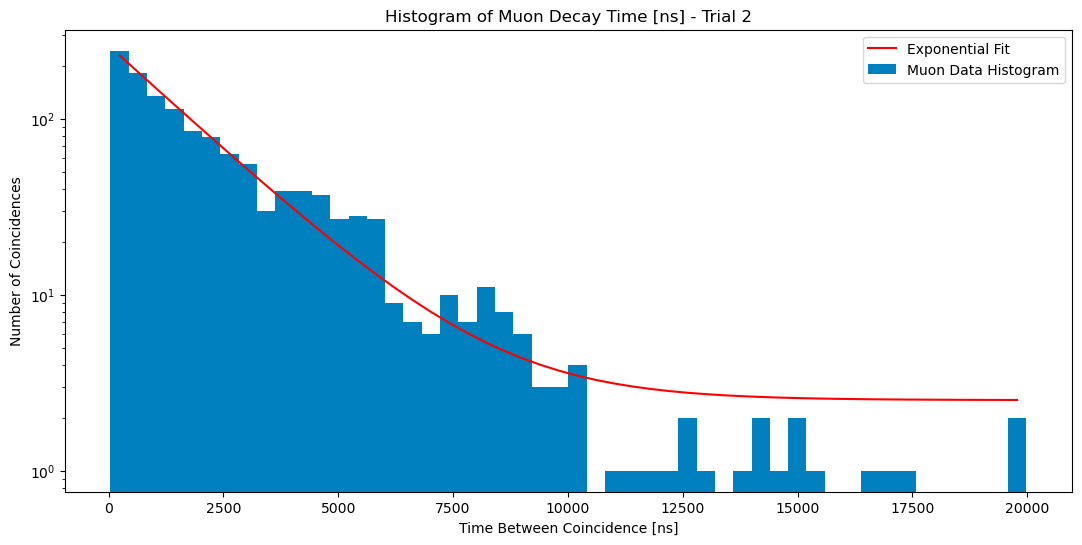

In [68]:
# Finding bin edges and calculating bin centers
count_per_bin2, bin_edges2 = np.histogram(muon_data2, bins = 50)

# Length between edge of bin and center
bin_center_distance2 = (bin_edges2[1] - bin_edges2[0])/2

# Calculating bin centers
bin_centers2 = (bin_edges2 + bin_center_distance2)[0:len(bin_edges2)-1] 
# The -1 gets rid of the last bin edge which doesn't exist

# Fitting an exponential decay curve to the histogram data

# Initial values
muon_data2_param0 = (300, 2500, 10)

# Fitting exponential decay function to bin centers
muon_data2_paramFit, muon_data2_paramErr = optimize.curve_fit(ExponentialDecay,
                                                              bin_centers2, 
                                                              count_per_bin2,
                                                              muon_data2_param0)


# Calculating y-values of best fit using best fit parameters
muon_data2_fit = ExponentialDecay(bin_centers2,
                                  muon_data2_paramFit[0],
                                  muon_data2_paramFit[1],
                                  muon_data2_paramFit[2])

# Defining a darker shade of blue using RGB values
blue_1 = (0, 0.5, .75)  # Adjusting the values to change the shade of blue


# Plotting fit to histogram of data
plt.figure(figsize=(13,6))
plt.plot(bin_centers2, muon_data2_fit, label='Exponential Fit', color='red')
plt.hist(muon_data2, bins = 50, color=blue_1, label='Muon Data Histogram')
plt.title('Histogram of Muon Decay Time [ns] - Trial 2')
plt.xlabel('Time Between Coincidence [ns]')
plt.ylabel('Number of Coincidences')
plt.yscale('log')
plt.legend()
plt.show()


## Calculating Poisson Error

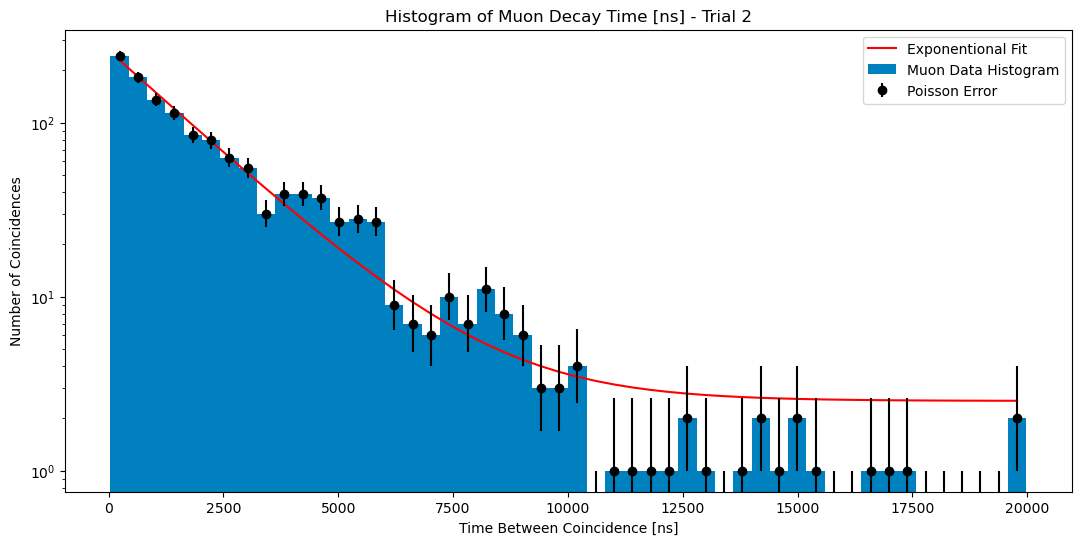

[2.38174989e+02 2.07249631e+03 2.58923594e-01]
[[10.587108           nan  0.73596578]
 [        nan 78.63427152         nan]
 [ 0.73596578         nan  0.26634605]]


/var/folders/r6/cc1z18ld07zdcz83rqq66mp40000gn/T/ipykernel_1810/1566801025.py:39: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(muon_data2_paramErr_sigma))


In [79]:
# Calculating error in the data bins and plotting them as error bars

# Calculating the high and low error in Poisson error
ErrHighMuon2 = 0.5+np.sqrt(count_per_bin2+0.25)
ErrLowMuon2 = -0.5+np.sqrt(count_per_bin2+0.25)

# Defining a darker shade of blue using RGB values
blue_1 = (0, 0.5, .75)  # Adjusting the values to change the shade of blue

# Plotting fit and histogram with error
plt.figure(figsize=(13,6))
plt.plot(bin_centers2, muon_data2_fit, label='Exponentional Fit', color='red')
plt.hist(muon_data2, bins = 50, label='Muon Data Histogram', color=blue_1)
plt.errorbar(bin_centers2,
             count_per_bin2,
             [ErrLowMuon2,ErrHighMuon2],
             ls='',
             marker='o',
             mfc='black',
             ms=6,
             mec='black',
             ecolor='black',
             label="Poisson Error")
plt.title('Histogram of Muon Decay Time [ns] - Trial 2')
plt.xlabel('Time Between Coincidence [ns]')
plt.ylabel('Number of Coincidences')
plt.yscale('log')
plt.legend()
plt.show()

# Fits exponential decay function to bin centers
muon_data2_paramFit_sigma, muon_data2_paramErr_sigma = optimize.curve_fit(ExponentialDecay,
                                                              bin_centers2, 
                                                              count_per_bin2,
                                                              muon_data2_param0,
                                                              sigma=ErrHighMuon2)

print(muon_data2_paramFit_sigma)
print(np.sqrt(muon_data2_paramErr_sigma))


#

<span style="font-size: 24px;">A = 238.2 $\pm$ 10.6, $\tau$ = 2.07 $\pm$ 0.08 $\mu s$ , B = 0.26 $\pm$ 0.27 events</span>

#

# Muon Data Collection 3 (runtime: ~ hrs.)

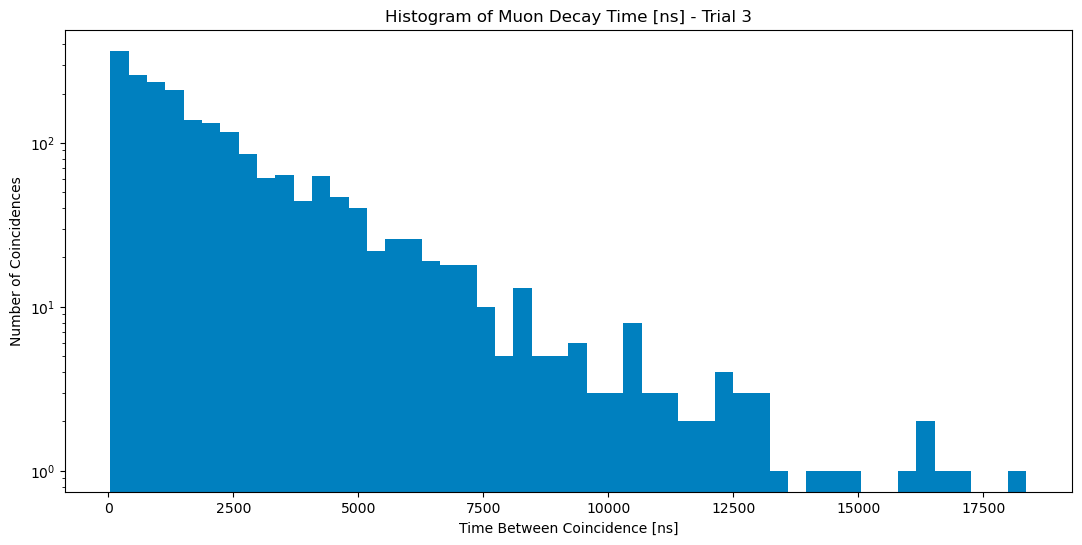

In [73]:
# Importing data
muon_raw_data3 = np.loadtxt("Lab 2 Data/muon_data3.txt", delimiter=' ')

# Filtering out data points where muon decays are not detected

# Empty list to put the muon decay data points into
muon_data3 = []

# Finding muon decay data points and putting them into the previously mentioned list
for i in range(0,len(muon_raw_data3)):
    if muon_raw_data3[i,0] < 39999:
        muon_data3.append(muon_raw_data3[i,0])

import matplotlib.pyplot as plt

# Defining a darker shade of blue using RGB values
blue_1 = (0, 0.5, .75)  # Adjusting the values to change the shade of blue

# Plotting the muon decay data points as a histogram with a log-scale y-axis
plt.figure(figsize=(13, 6))
plt.hist(muon_data3, bins=50, color=blue_1)
plt.title('Histogram of Muon Decay Time [ns] - Trial 3')
plt.xlabel('Time Between Coincidence [ns]')
plt.ylabel('Number of Coincidences')
plt.yscale('log')
plt.show()


## Creating An Exponential Fit

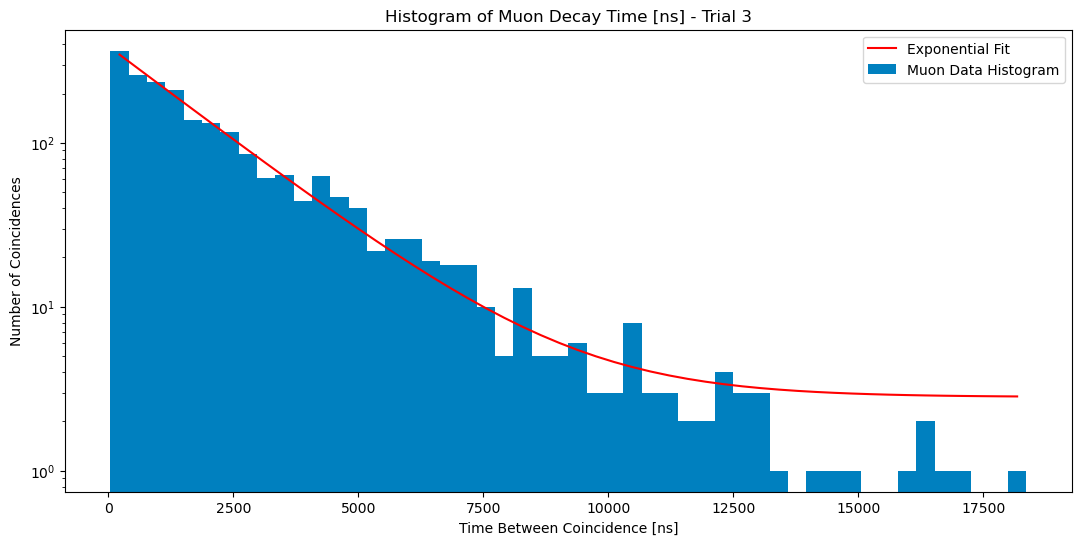

In [76]:
# Finding bin edges and calculating bin centers
count_per_bin3, bin_edges3 = np.histogram(muon_data3, bins = 50)

# Length between edge of bin and center
bin_center_distance3 = (bin_edges3[1] - bin_edges3[0])/2

# Calculating bin centers
bin_centers3 = (bin_edges3 + bin_center_distance3)[0:len(bin_edges3)-1] 
# The -1 gets rid of the last bin edge which doesn't exist

# Fitting an exponential decay curve to the histogram data

# Initial values
muon_data3_param0 = (300, 2500, 10)

# Fitting exponential decay function to bin centers
muon_data3_paramFit, muon_data3_paramErr = optimize.curve_fit(ExponentialDecay,
                                                              bin_centers3, 
                                                              count_per_bin3,
                                                              muon_data3_param0)


# Calculating y-values of best fit using best fit parameters
muon_data3_fit = ExponentialDecay(bin_centers3,
                                  muon_data3_paramFit[0],
                                  muon_data3_paramFit[1],
                                  muon_data3_paramFit[2])

# Defining a darker shade of blue using RGB values
blue_1 = (0, 0.5, .75)  # Adjusting the values to change the shade of blue


# Plotting fit to histogram of data
plt.figure(figsize=(13,6))
plt.plot(bin_centers3, muon_data3_fit, label='Exponential Fit', color='red')
plt.hist(muon_data3, bins = 50, color=blue_1, label='Muon Data Histogram')
plt.title('Histogram of Muon Decay Time [ns] - Trial 3')
plt.xlabel('Time Between Coincidence [ns]')
plt.ylabel('Number of Coincidences')
plt.yscale('log')
plt.legend()
plt.show()


## Calculating Poisson Error

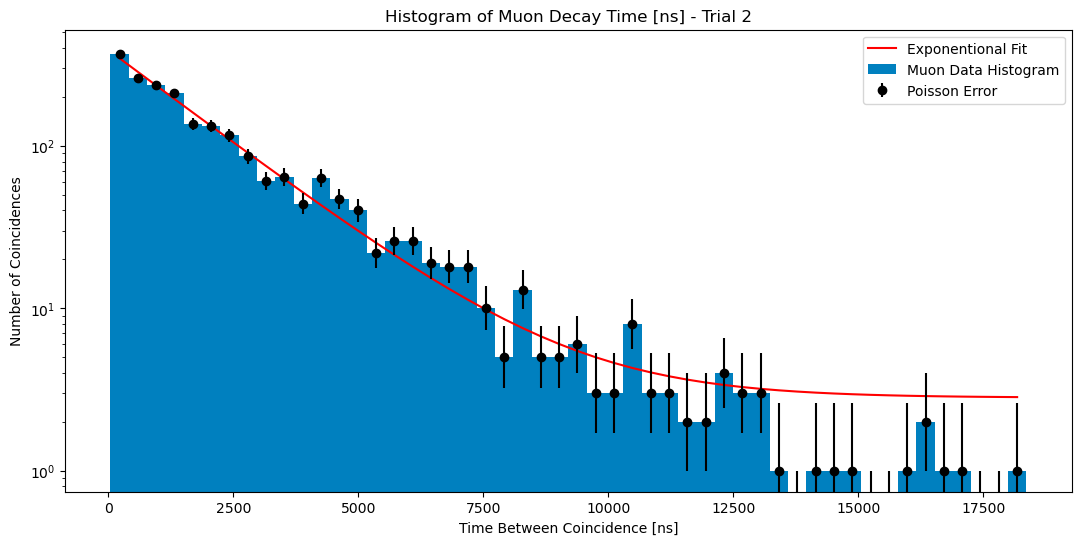

[3.64346437e+02 2.05872854e+03 5.03232627e-01]
[[12.33293578         nan  0.85479557]
 [        nan 58.78163072         nan]
 [ 0.85479557         nan  0.31344831]]


/var/folders/r6/cc1z18ld07zdcz83rqq66mp40000gn/T/ipykernel_1810/3675472726.py:39: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(muon_data3_paramErr_sigma))


In [80]:
# Calculating error in the data bins and plotting them as error bars

# Calculating the high and low error in Poisson error
ErrHighMuon3 = 0.5+np.sqrt(count_per_bin3+0.25)
ErrLowMuon3 = -0.5+np.sqrt(count_per_bin3+0.25)

# Defining a darker shade of blue using RGB values
blue_1 = (0, 0.5, .75)  # Adjusting the values to change the shade of blue

# Plotting fit and histogram with error
plt.figure(figsize=(13,6))
plt.plot(bin_centers3, muon_data3_fit, label='Exponentional Fit', color='red')
plt.hist(muon_data3, bins = 50, label='Muon Data Histogram', color=blue_1)
plt.errorbar(bin_centers3,
             count_per_bin3,
             [ErrLowMuon3,ErrHighMuon3],
             ls='',
             marker='o',
             mfc='black',
             ms=6,
             mec='black',
             ecolor='black',
             label="Poisson Error")
plt.title('Histogram of Muon Decay Time [ns] - Trial 2')
plt.xlabel('Time Between Coincidence [ns]')
plt.ylabel('Number of Coincidences')
plt.yscale('log')
plt.legend()
plt.show()

# Fits exponential decay function to bin centers
muon_data3_paramFit_sigma, muon_data3_paramErr_sigma = optimize.curve_fit(ExponentialDecay,
                                                              bin_centers3, 
                                                              count_per_bin3,
                                                              muon_data3_param0,
                                                              sigma=ErrHighMuon3)

print(muon_data3_paramFit_sigma)
print(np.sqrt(muon_data3_paramErr_sigma))


#

<span style="font-size: 24px;">A = 364.3 $\pm$ 12.3, $\tau$ = 2.06 $\pm$ 0.06 $\mu s$ , B = 0.50 $\pm$ 0.31 events</span>

#

# Concatenated Data

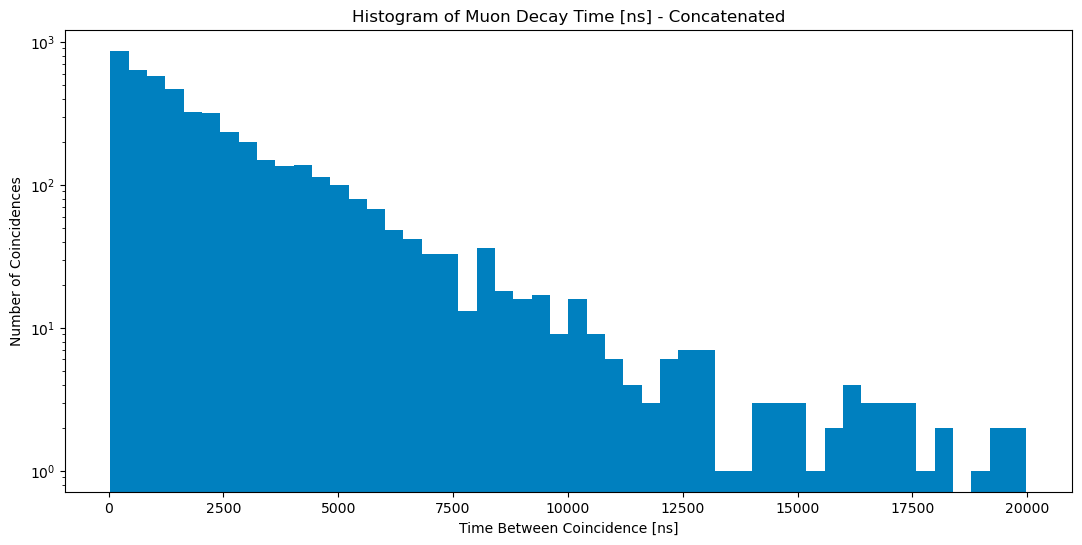

In [84]:
# Concatenating the three data sets, producing a combined data set

muon_data_con = np.concatenate((muon_data1, muon_data2, muon_data3))

# Defining a darker shade of blue using RGB values
blue_1 = (0, 0.5, .75)  # Adjusting the values to change the shade of blue

# Plotting the muon decay data points as a histogram with a log-scale y-axis
plt.figure(figsize=(13, 6))
plt.hist(muon_data_con, bins=50, color=blue_1)
plt.title('Histogram of Muon Decay Time [ns] - Concatenated')
plt.xlabel('Time Between Coincidence [ns]')
plt.ylabel('Number of Coincidences')
plt.yscale('log')
plt.show()

## Creating An Exponential Fit

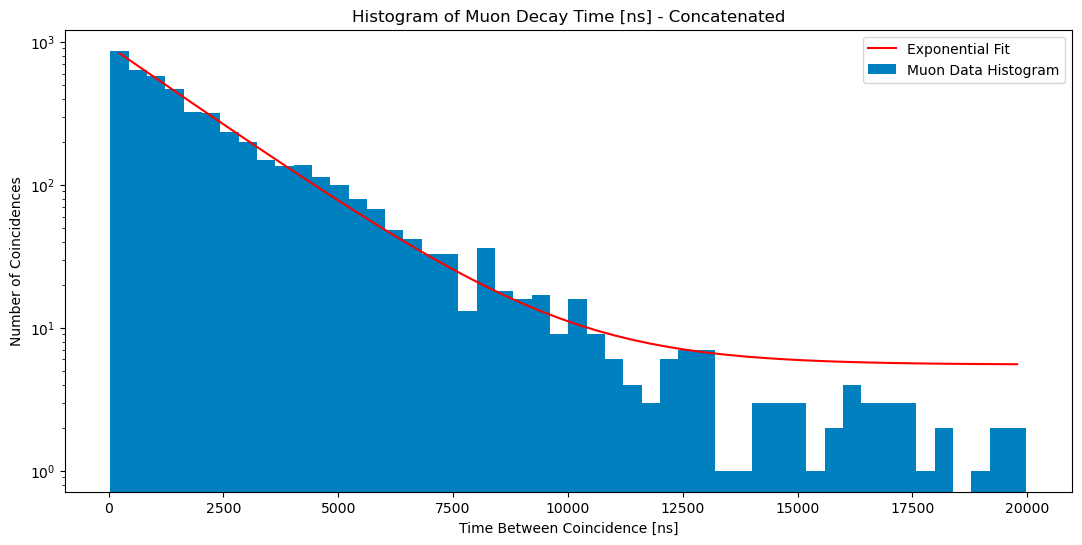

In [85]:
# Finding bin edges and calculating bin centers
count_per_bin4, bin_edges4 = np.histogram(muon_data_con, bins = 50)

# Length between edge of bin and center
bin_center_distance4 = (bin_edges4[1] - bin_edges4[0])/2

# Calculating bin centers
bin_centers4 = (bin_edges4 + bin_center_distance4)[0:len(bin_edges4)-1] 
# The -1 gets rid of the last bin edge which doesn't exist

# Fitting an exponential decay curve to the histogram data

# Initial values
muon_data_con_param0 = (300, 2500, 10)

# Fitting exponential decay function to bin centers
muon_data_con_paramFit, muon_data_con_paramErr = optimize.curve_fit(ExponentialDecay,
                                                              bin_centers4, 
                                                              count_per_bin4,
                                                              muon_data_con_param0)


# Calculating y-values of best fit using best fit parameters
muon_data_con_fit = ExponentialDecay(bin_centers4,
                                  muon_data_con_paramFit[0],
                                  muon_data_con_paramFit[1],
                                  muon_data_con_paramFit[2])

# Defining a darker shade of blue using RGB values
blue_1 = (0, 0.5, .75)  # Adjusting the values to change the shade of blue


# Plotting fit to histogram of data
plt.figure(figsize=(13,6))
plt.plot(bin_centers4, muon_data_con_fit, label='Exponential Fit', color='red')
plt.hist(muon_data_con, bins = 50, color=blue_1, label='Muon Data Histogram')
plt.title('Histogram of Muon Decay Time [ns] - Concatenated')
plt.xlabel('Time Between Coincidence [ns]')
plt.ylabel('Number of Coincidences')
plt.yscale('log')
plt.legend()
plt.show()


## Calculating Poisson Error

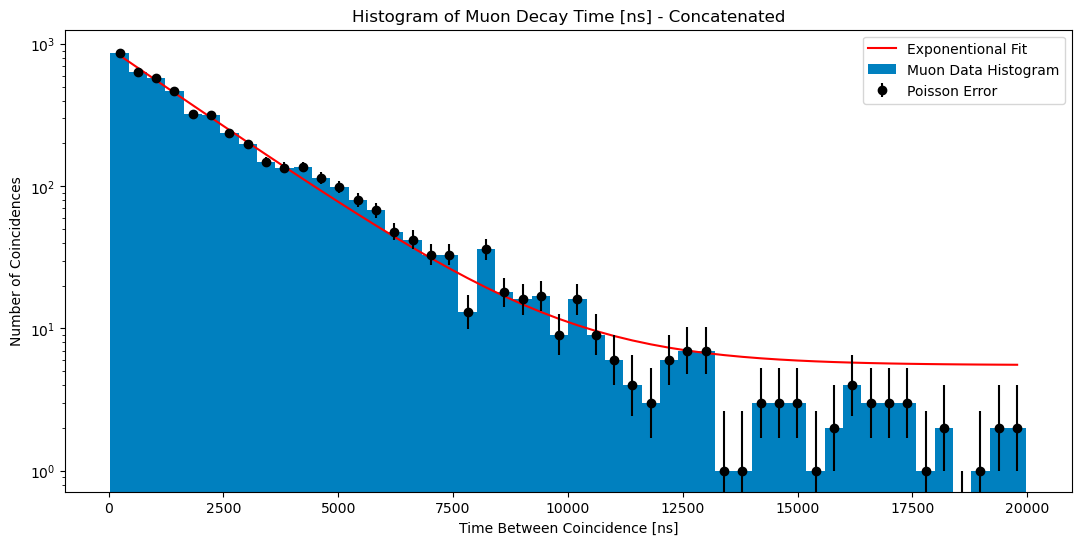

[8.90826420e+02 2.10966934e+03 1.31632636e+00]
[[23.60745682         nan  1.46875856]
 [        nan 45.72279462         nan]
 [ 1.46875856         nan  0.49352077]]


/var/folders/r6/cc1z18ld07zdcz83rqq66mp40000gn/T/ipykernel_1810/360243405.py:39: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(muon_data_con_paramErr_sigma))


In [86]:
# Calculating error in the data bins and plotting them as error bars

# Calculating the high and low error in Poisson error
ErrHighMuon4 = 0.5+np.sqrt(count_per_bin4+0.25)
ErrLowMuon4 = -0.5+np.sqrt(count_per_bin4+0.25)

# Defining a darker shade of blue using RGB values
blue_1 = (0, 0.5, .75)  # Adjusting the values to change the shade of blue

# Plotting fit and histogram with error
plt.figure(figsize=(13,6))
plt.plot(bin_centers4, muon_data_con_fit, label='Exponentional Fit', color='red')
plt.hist(muon_data_con, bins = 50, label='Muon Data Histogram', color=blue_1)
plt.errorbar(bin_centers4,
             count_per_bin4,
             [ErrLowMuon4,ErrHighMuon4],
             ls='',
             marker='o',
             mfc='black',
             ms=6,
             mec='black',
             ecolor='black',
             label="Poisson Error")
plt.title('Histogram of Muon Decay Time [ns] - Concatenated')
plt.xlabel('Time Between Coincidence [ns]')
plt.ylabel('Number of Coincidences')
plt.yscale('log')
plt.legend()
plt.show()

# Fits exponential decay function to bin centers
muon_data_con_paramFit_sigma, muon_data_con_paramErr_sigma = optimize.curve_fit(ExponentialDecay,
                                                              bin_centers4, 
                                                              count_per_bin4,
                                                              muon_data_con_param0,
                                                              sigma=ErrHighMuon4)

print(muon_data_con_paramFit_sigma)
print(np.sqrt(muon_data_con_paramErr_sigma))


#

<span style="font-size: 24px;">A = 890.8 $\pm$ 23.6, $\tau$ = 2.11 $\pm$ 0.05 $\mu s$ , B = 1.3 $\pm$ 0.5 events</span>